In [365]:
import pandas as pd


import numpy as np

import matplotlib.pyplot as plt

In [366]:
mean1 = 55

std_dev1 = 10

num_samples = 500

column1_numbers = np.random.normal(mean1 , std_dev1 , num_samples)

column1_numbers = np.clip(column1_numbers , 30 , 120)

column1_numbers = np.round(column1_numbers).astype(int)


mean2 = 18
std_dev2 = 3

column2_numbers = np.random.normal(mean2 , std_dev2 , num_samples)

column2_numbers = np.clip(column2_numbers , 12 , 26)

column2_numbers = np.round(column2_numbers).astype(int)


column3_numbers = np.random.randint(2 , size= num_samples)
column3_numbers[column1_numbers > mean1 ] = 1


data = { 'Miles_per_week': column1_numbers,
        'Farthest_run': column2_numbers,
        'Qualified_Boston_Marathon': column3_numbers

}


df = pd.DataFrame(data)



In [367]:
df

,Miles_per_week,Farthest_run,Qualified_Boston_Marathon
0,57,20,1
1,54,15,1
2,56,15,1
3,53,17,1
4,47,19,0
...,...,...,...
495,46,20,0
496,44,14,1
497,60,15,1
498,50,19,1


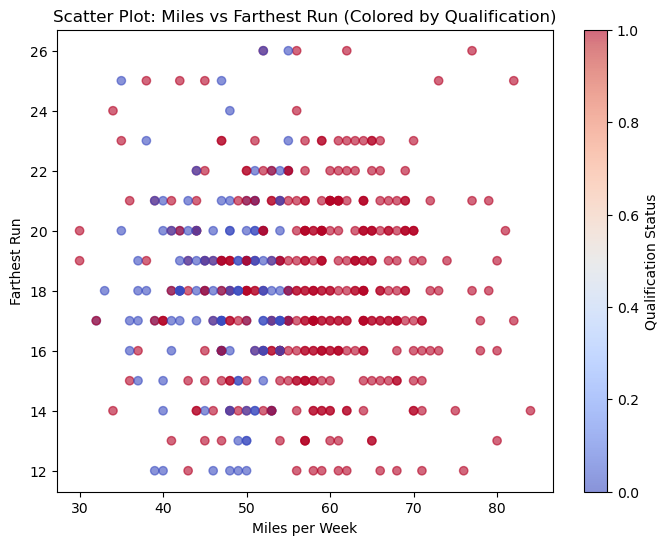

In [368]:
# Create a scatter plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(column1_numbers, column2_numbers, c=column3_numbers, cmap='coolwarm', alpha=0.6)

# Adding labels and title
plt.xlabel('Miles per Week')
plt.ylabel('Farthest Run')
plt.title('Scatter Plot: Miles vs Farthest Run (Colored by Qualification)')

# Adding a color bar
plt.colorbar(scatter, label='Qualification Status')

# Show the plot
plt.show()

In [369]:
X = df.iloc[:, 0:2]

In [370]:
X

,Miles_per_week,Farthest_run
0,57,20
1,54,15
2,56,15
3,53,17
4,47,19
...,...,...
495,46,20
496,44,14
497,60,15
498,50,19


In [371]:
y = df.iloc[: , 2]

In [372]:
y

0      1
1      1
2      1
3      1
4      0
      ..
495    0
496    1
497    1
498    1
499    1
Name: Qualified_Boston_Marathon, Length: 500, dtype: int64

In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state = 33 , test_size = 0.2)

In [375]:
from sklearn.svm import SVC

In [376]:
model = SVC()

In [377]:
model.fit(X_train , y_train)

SVC()

In [378]:
model.score(X_test , y_test)

0.82

### regularization

In [379]:
model_reg0 = SVC(C = 0.1)

In [380]:
model_reg0.fit(X_train , y_train)

SVC(C=0.1)

In [381]:
model_reg0.score(X_test , y_test)

0.73

In [382]:
model_reg1 = SVC(C = 1)


model_reg1.fit(X_train , y_train)
model_reg1.score(X_test , y_test)

0.82

In [383]:
model_reg2 = SVC(C = 1000)


model_reg2.fit(X_train , y_train)
model_reg2.score(X_test , y_test)

0.85

### gamma 

In [384]:
model_gamma0 = SVC(gamma=  0.01)


model_gamma0.fit(X_train , y_train)
model_gamma0.score(X_test , y_test)

0.82

In [385]:
model_gamma1 = SVC(gamma=  1)


model_gamma1.fit(X_train , y_train)
model_gamma1.score(X_test , y_test)

0.8

In [386]:
model_gamma2 = SVC(gamma=  1000)


model_gamma2.fit(X_train , y_train)
model_gamma2.score(X_test , y_test)

0.75

### kernel 

In [387]:


model_linear = SVC(kernel = 'linear')

model_linear.fit(X_train , y_train)

model_linear.score(X_test , y_test)

0.78

In [388]:
model_linear = SVC(kernel = 'rbf')

model_linear.fit(X_train , y_train)

model_linear.score(X_test , y_test)

0.82